<a href="https://colab.research.google.com/github/sumeetbabar2809/Hotel-booking-analysis/blob/main/hotel_booking_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Project description**

Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions! This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. Explore and analyse the data to discover important factors that govern the bookings.

###**Dataset description**

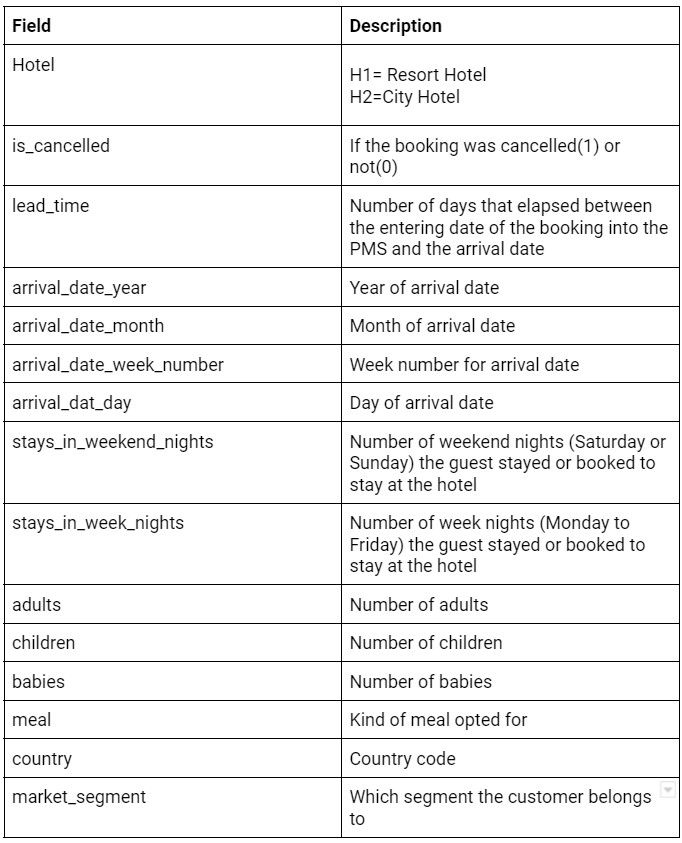

In [1]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/Capstone/Hotel booking analysis/Projectdescription.jpg', width=512)

### **importing libraries**

In [2]:
#import drive & libraries
from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = ('/content/drive/MyDrive/Capstone/Hotel booking analysis/Hotel Bookings.csv')
data = pd.read_csv(data)
data.T

,0,1,2,3,4,5,6,7,8,9,...,119380,119381,119382,119383,119384,119385,119386,119387,119388,119389
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,...,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel
is_canceled,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
lead_time,342,737,7,13,14,14,0,9,85,75,...,44,188,135,164,21,23,102,34,109,205
arrival_date_year,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,...,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017
arrival_date_month,July,July,July,July,July,July,July,July,July,July,...,August,August,August,August,August,August,August,August,August,August
arrival_date_week_number,27,27,27,27,27,27,27,27,27,27,...,35,35,35,35,35,35,35,35,35,35
arrival_date_day_of_month,1,1,1,1,1,1,1,1,1,1,...,31,31,30,31,30,30,31,31,31,29
stays_in_weekend_nights,0,0,0,0,0,0,0,0,0,0,...,1,2,2,2,2,2,2,2,2,2
stays_in_week_nights,0,0,1,1,2,2,2,2,3,3,...,3,3,4,4,5,5,5,5,5,7
adults,2,2,1,1,2,2,2,2,2,2,...,2,2,3,2,2,2,3,2,2,2


###**Understanding data**

In [4]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
data.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [6]:
data.shape

(119390, 32)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


###**Data wrangling**

In [9]:
data.isnull().sum() #checking null

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [10]:
data.isna().sum() #checking Nan

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

* Dropping agent and company because of high null values



In [11]:
data.drop(['agent','company'],axis =1,inplace=True)

In [12]:
data.columns #checking columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [13]:
data.dropna(inplace=True)#drpping NA
data.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [14]:
data['reservation_status_date']=pd.to_datetime(data['reservation_status_date'])
#to change the datatype of "reservation_status_date" from "objects" to "datetime"
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118898 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118898 non-null  object        
 1   is_canceled                     118898 non-null  int64         
 2   lead_time                       118898 non-null  int64         
 3   arrival_date_year               118898 non-null  int64         
 4   arrival_date_month              118898 non-null  object        
 5   arrival_date_week_number        118898 non-null  int64         
 6   arrival_date_day_of_month       118898 non-null  int64         
 7   stays_in_weekend_nights         118898 non-null  int64         
 8   stays_in_week_nights            118898 non-null  int64         
 9   adults                          118898 non-null  int64         
 10  children                        118898 non-null  float64     

In [15]:
data['children'] = data['children'].astype(int) #changing float to int64
data['arrival_date_year'] = data['arrival_date_year'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118898 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118898 non-null  object        
 1   is_canceled                     118898 non-null  int64         
 2   lead_time                       118898 non-null  int64         
 3   arrival_date_year               118898 non-null  int64         
 4   arrival_date_month              118898 non-null  object        
 5   arrival_date_week_number        118898 non-null  int64         
 6   arrival_date_day_of_month       118898 non-null  int64         
 7   stays_in_weekend_nights         118898 non-null  int64         
 8   stays_in_week_nights            118898 non-null  int64         
 9   adults                          118898 non-null  int64         
 10  children                        118898 non-null  int64       

In [16]:
data.head().T #checking the data

,0,1,2,3,4
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel
is_canceled,0,0,0,0,0
lead_time,342,737,7,13,14
arrival_date_year,2015,2015,2015,2015,2015
arrival_date_month,July,July,July,July,July
arrival_date_week_number,27,27,27,27,27
arrival_date_day_of_month,1,1,1,1,1
stays_in_weekend_nights,0,0,0,0,0
stays_in_week_nights,0,0,1,1,2
adults,2,2,1,1,2


In [17]:
[print(col,data[col].unique()) for col in data.describe(include='object').columns]

hotel ['Resort Hotel' 'City Hotel']
arrival_date_month ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
meal ['BB' 'FB' 'HB' 'SC' 'Undefined']
country ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC'
 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR'
 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI' 'SAU'
 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB' 'NPL'
 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IRQ' '

[None, None, None, None, None, None, None, None, None, None, None]

###**Checking outliers**

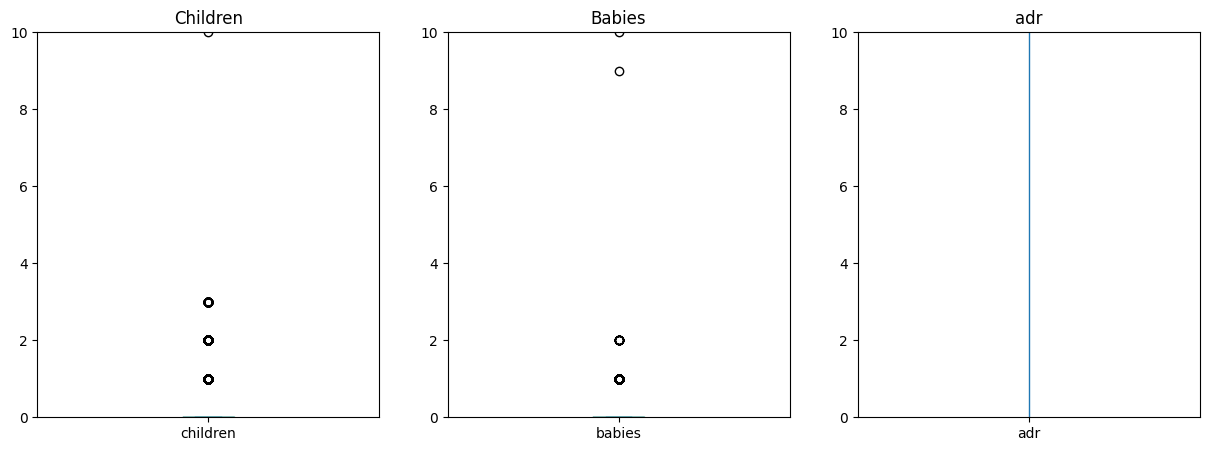

In [18]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plotting box plots for children, babies, and adults
data['children'].plot(kind='box', ax=axs[0])
axs[0].set_ylim(0, 10)
axs[0].set_title('Children')

data['babies'].plot(kind='box', ax=axs[1])
axs[1].set_ylim(0, 10)
axs[1].set_title('Babies')

data['adr'].plot(kind='box', ax=axs[2])
axs[2].set_ylim(0, 10)
axs[2].set_title('adr')

plt.show()

In [19]:
data=data[data['children']<6] #removing the outlier
#data['children'].plot(kind='box') #checking after removing

data=data[data['babies']<8] #removing
#data['babies'].plot(kind='box') #checking after removing

data=data[data['adr']<5000] #removing value above 5000
data=data[data['adr']>0] #removing value below 0
#data['adr'].plot(kind='box') #checking after removing


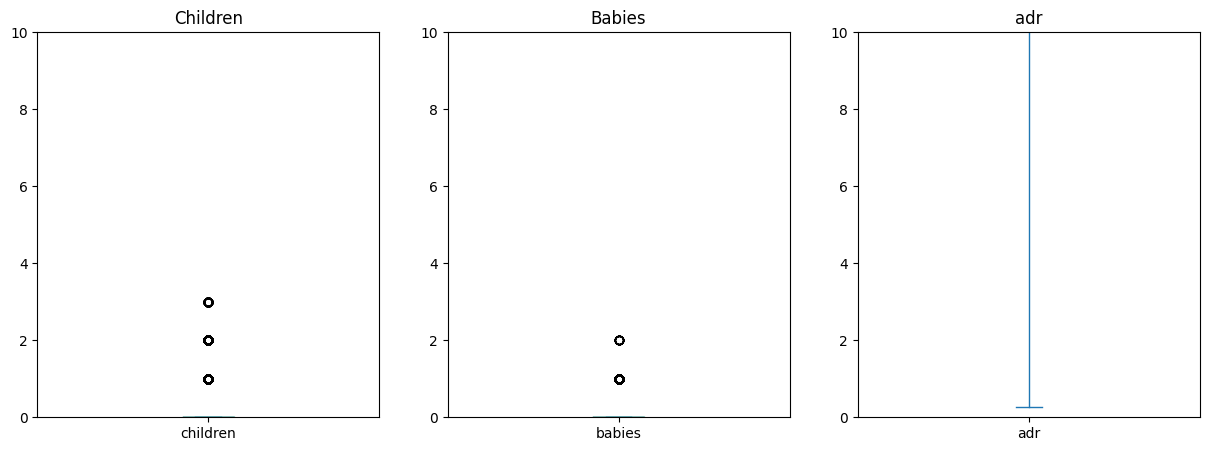

In [20]:
#checking after removing

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plotting box plots for children, babies, and adults
data['children'].plot(kind='box', ax=axs[0])
axs[0].set_ylim(0, 10)
axs[0].set_title('Children')

data['babies'].plot(kind='box', ax=axs[1])
axs[1].set_ylim(0, 10)
axs[1].set_title('Babies')

data['adr'].plot(kind='box', ax=axs[2])
axs[2].set_ylim(0, 10)
axs[2].set_title('adr')

plt.show()

In [21]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
is_canceled,116955.0,0.375768,0.0,0.0,0.0,1.0,1.0,0.484323
lead_time,116955.0,105.378701,0.0,19.0,71.0,162.0,709.0,106.945084
arrival_date_year,116955.0,2016.161464,2015.0,2016.0,2016.0,2017.0,2017.0,0.706501
arrival_date_week_number,116955.0,27.138173,1.0,16.0,27.0,38.0,53.0,13.561081
arrival_date_day_of_month,116955.0,15.805156,1.0,8.0,16.0,23.0,31.0,8.783137
stays_in_weekend_nights,116955.0,0.93766,0.0,0.0,1.0,2.0,16.0,0.993293
stays_in_week_nights,116955.0,2.522928,0.0,1.0,2.0,3.0,41.0,1.885466
adults,116955.0,1.862443,0.0,2.0,2.0,2.0,4.0,0.481128
children,116955.0,0.104741,0.0,0.0,0.0,0.0,3.0,0.399254
babies,116955.0,0.007704,0.0,0.0,0.0,0.0,2.0,0.088792


* There are no outliers detected in the 'adults'and 'babies' data as the minimum value is 1 for 'adults' and 0 for 'babies and the maximum value is 3 for 'adult' and 1 for 'babies, which indicates that no data points fall outside the expected range.
* For 'children' minimum is 0 and maximum is 1.

###**Data visualization**

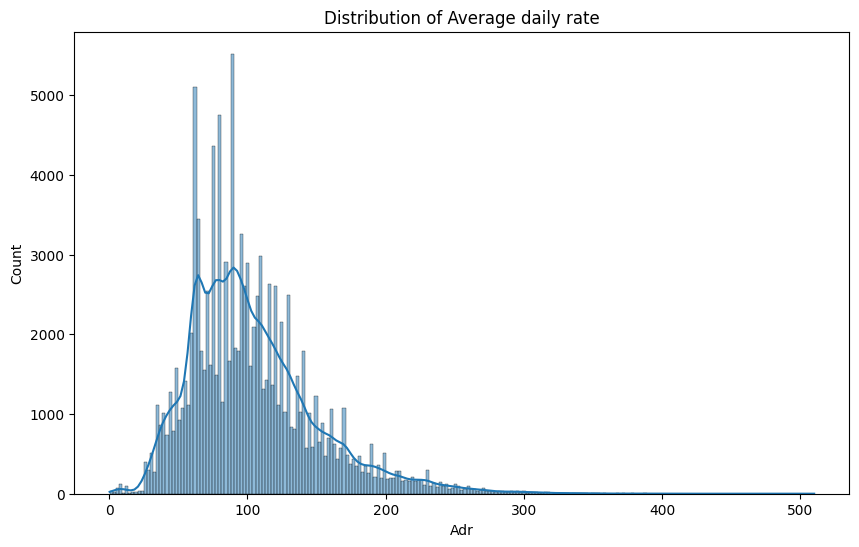

In [22]:
# Univariate analysis using a histogram
plt.figure(figsize=(10, 6))  # Set the figure size
sns.histplot(data=data, x='adr', kde=True)  # Create a histogram for the variable 'age'
plt.title('Distribution of Average daily rate')
plt.xlabel('Adr')
plt.ylabel('Count')
plt.show()

* the observation of a low average daily rate alongside a high count suggests a prevalent trend of lower pricing across a high volume of instances.

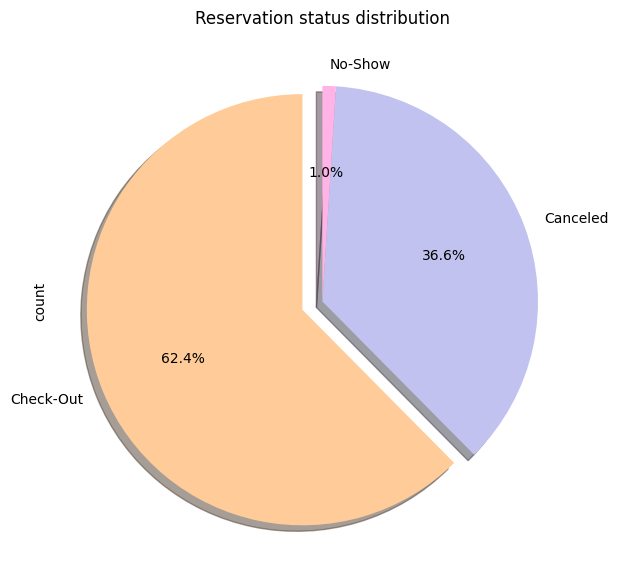

In [23]:
plt.figure(figsize=(11, 7))  # Set the figure size
explode = (0.1, 0, 0)  # For example, explode the first slice
color_palette = ['#ffcc99', '#c2c2f0', '#ffb3e6']  # Define a custom color palette
data['reservation_status'].value_counts().plot(kind='pie', autopct="%1.1f%%", startangle=90, shadow=True, explode=explode, colors=color_palette)
plt.title('Reservation status distribution')
plt.show()

* Resevation status distribution shows check-out is 62.4%.
* canceled is 36.%.
* No-show is 1.0%.

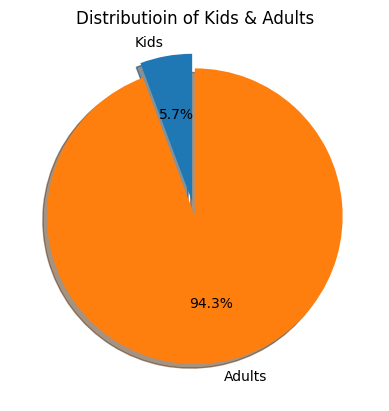

In [24]:
data['kids'] = data['children'] + data['babies']
kids = data['kids'].sum()
adults = data['adults'].sum()
plt.pie([kids, adults], labels=['Kids', 'Adults'], autopct='%1.1f%%', startangle=90, shadow=True, explode=(0.1, 0))
plt.title('Distributioin of Kids & Adults')
plt.show()

* Distribution of adults and kids shows that 94.3% are adults and 5.7% are kids.

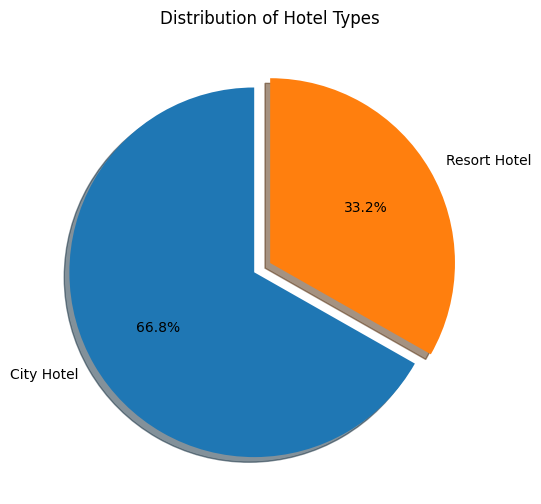

In [25]:
hotel_types = data['hotel'].value_counts() # counting values
plt.figure(figsize=(10, 6))
plt.pie(hotel_types, labels=hotel_types.index, autopct="%1.1f%%", startangle=90,shadow=True, explode=(0.1, 0))
plt.title('Distribution of Hotel Types')
plt.show()

* The distribution of pie chart shows that 66.7% represents city hotels, while 33.3% represents Resort hotels

In [26]:
import plotly.express as px #use of Plotly Express to create visualizations

# Calculate the percentage of market segments
market_segment_counts = data['market_segment'].value_counts(normalize=True) * 100

# Use a predefined color palette provided by Plotly
fig = px.pie(values=market_segment_counts, names=market_segment_counts.index, hole=0.3,
             title="Proportion of Market Segments", color_discrete_sequence=px.colors.qualitative.Set3)

fig.show()

The donut chart displays the market segment distribution as follows:
- Online TA constitutes 47.9% of the market.
- Offline TA/TO accounts for 20.4% of the market share.
- Groups represent 16.7% of the market.
- Direct captures 10.4% of the market.
- Corporate segment holds 4.3% of the market.
- Aviation contributes 0.198% of the market share.
- Complementary covers 0.0539% of the market.

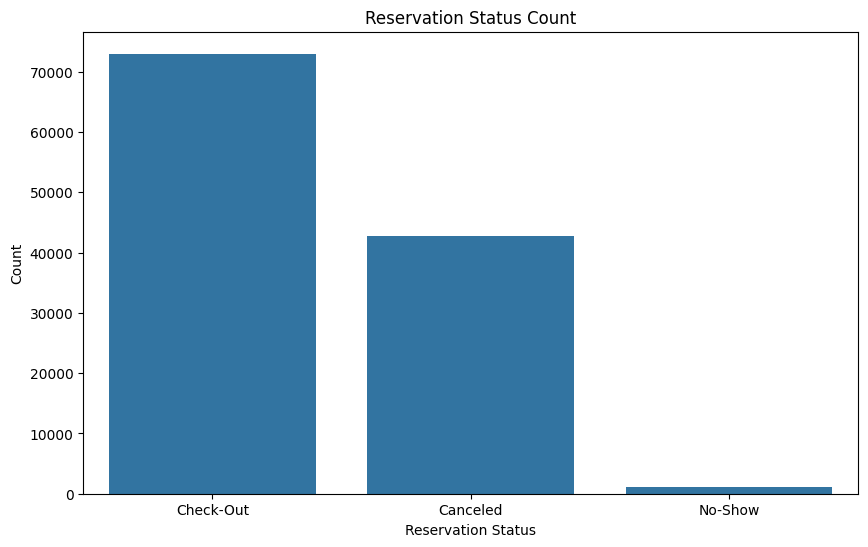

In [27]:
# Create a countplot of reservation status
plt.figure(figsize=(10, 6))  # Set the figure size
sns.countplot(x='reservation_status', data=data)
# Add title and labels
plt.title('Reservation Status Count')
plt.xlabel('Reservation Status')
plt.ylabel('Count')
# Show the plot
plt.show()

* The countplot of reservation status indicates that check-out counts are higher than cancelled reservations, with "no show" status falling even lower.
* This suggests a pattern where more completed check-outs occur compared to cancellations, and even less frequent are instances of "no show."

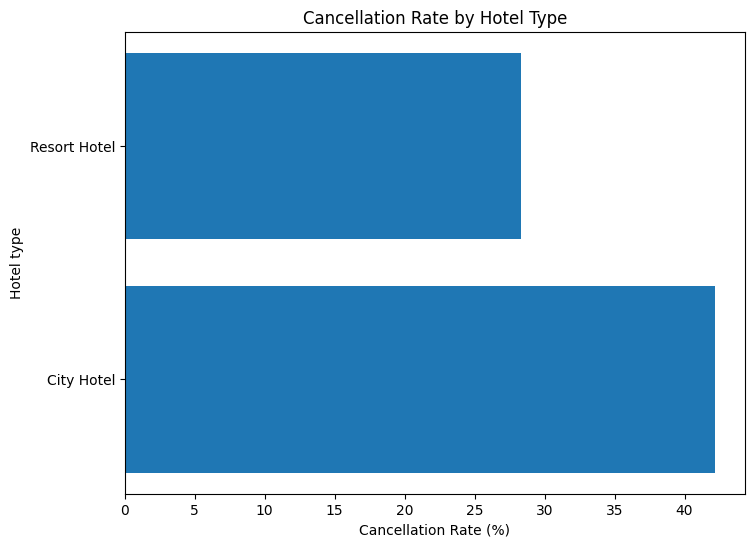

Cancellation rate for City Hotel: 42.20%
Cancellation rate for Resort Hotel: 28.29%
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


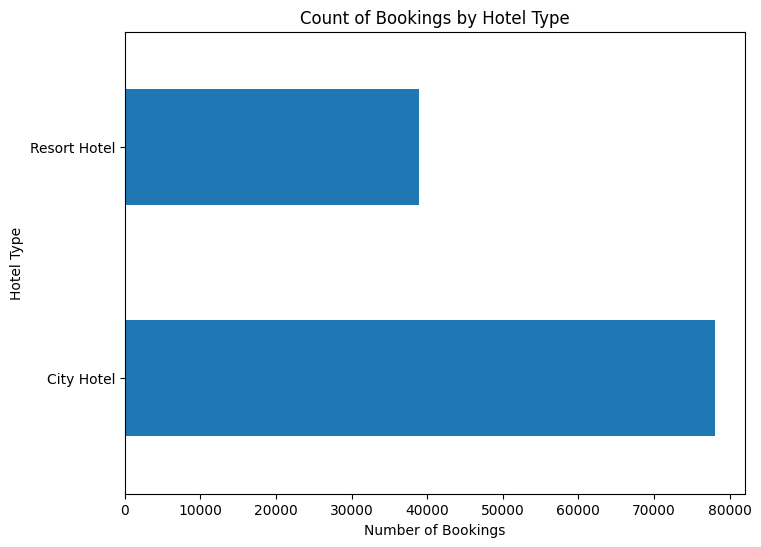

hotel
City Hotel      78099
Resort Hotel    38856
Name: count, dtype: int64


In [28]:
# Visualization of cancellation rate by hotel with specified figsize
plt.figure(figsize=(8, 6))  # Example figsize
cancellation_rate = data.groupby('hotel')['is_canceled'].mean() * 100
plt.barh(cancellation_rate.index, cancellation_rate.values)
plt.xlabel('Cancellation Rate (%)')
plt.ylabel('Hotel type')
plt.title('Cancellation Rate by Hotel Type')
plt.show()

# Display cancellation rates for each hotel type
print(f"Cancellation rate for City Hotel: {cancellation_rate['City Hotel']:.2f}%")
print(f"Cancellation rate for Resort Hotel: {cancellation_rate['Resort Hotel']:.2f}%")

# Separation for improved readability
print('-'*180)

# Visualization of count of bookings by hotel with specified figsize
plt.figure(figsize=(8, 6))  # Example figsize
data['hotel'].value_counts().plot(kind='barh')
plt.title('Count of Bookings by Hotel Type')
plt.xlabel('Number of Bookings')
plt.ylabel('Hotel Type')
plt.show()

# Print count of bookings by hotel type
print(data['hotel'].value_counts())

* The conclusion drawn from the data shows that the cancellation rate for City Hotels is notably higher at 42.20% compared to Resort Hotels, which stands at 28.29%.
* Additionally, there were 78099 bookings for City Hotels and 38856 bookings for Resort Hotels.
* These findings can guide further analysis and decision-making related to hotel management and customer booking patterns.

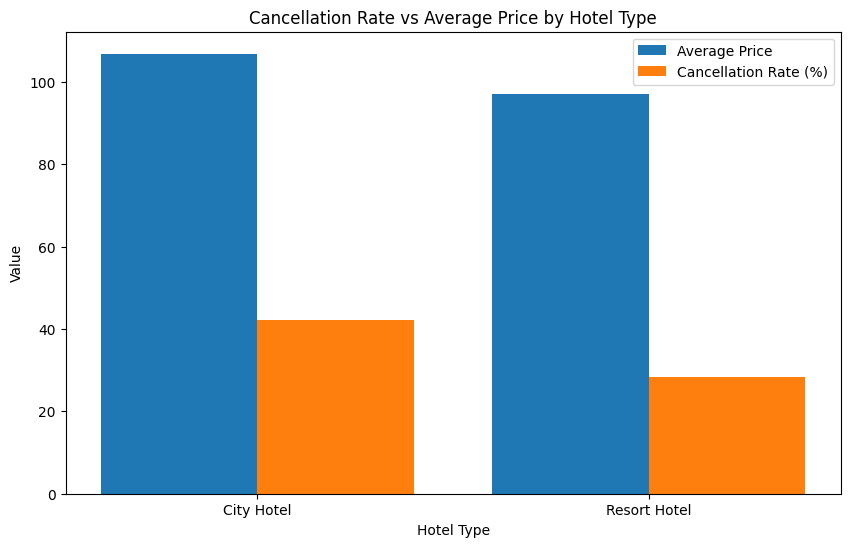

Overall Average Price by Hotel: 102.02
Overall Cancellation Rate by Hotel: 35.24%


In [29]:
avg_price_by_hotel = data.groupby('hotel')['adr'].mean()
cancellation_rate_by_hotel = data.groupby('hotel')['is_canceled'].mean() * 100

# Create a bar chart to compare average price and cancellation rates by hotel type
plt.figure(figsize=(10, 6))
bar_width = 0.4  # Width of the bars

# Define the positions of the bars
bar1 = range(len(avg_price_by_hotel))
bar2 = [x + bar_width for x in bar1]

plt.bar(bar1, avg_price_by_hotel.values, width=bar_width, label='Average Price')
plt.bar(bar2, cancellation_rate_by_hotel.values, width=bar_width, label='Cancellation Rate (%)')

# Adjust x-axis labels
plt.xticks([r + bar_width / 2 for r in range(len(avg_price_by_hotel))], avg_price_by_hotel.index)

# Add labels and title
plt.xlabel('Hotel Type')
plt.ylabel('Value')
plt.title('Cancellation Rate vs Average Price by Hotel Type')
plt.legend()
plt.show()

# Display overall average price and cancellation rate by hotel type
print(f"Overall Average Price by Hotel: {avg_price_by_hotel.mean():.2f}")
print(f"Overall Cancellation Rate by Hotel: {cancellation_rate_by_hotel.mean():.2f}%")

* The cancellation rate for the overall average price by hotel is 35.24%, with an overall average price of 102.02.
* This data could indicate a potential correlation between average pricing and cancellation rates in the two types of hotels.
* Further analysis could explore how pricing may impact cancellation behavior in City and Resort hotels.

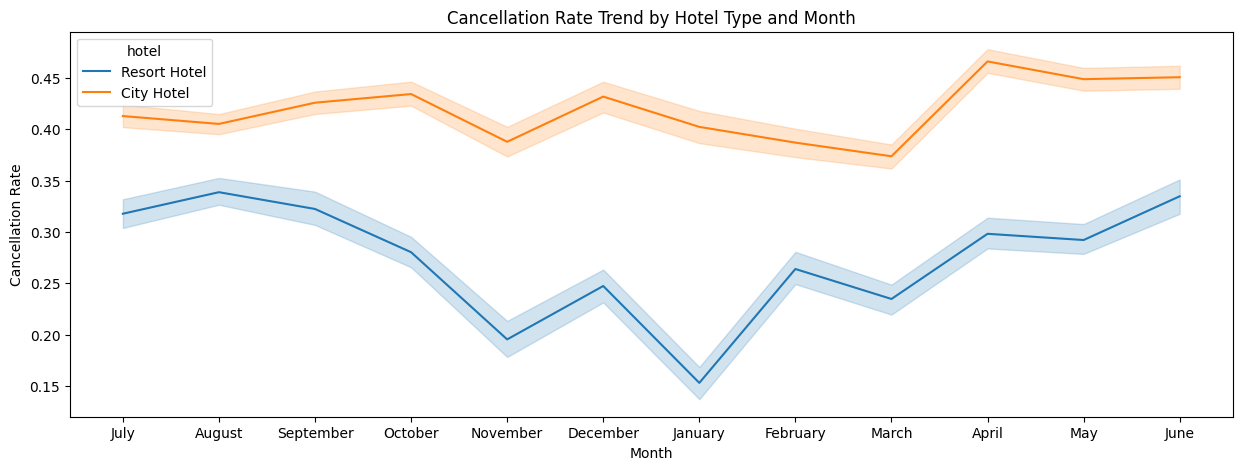

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


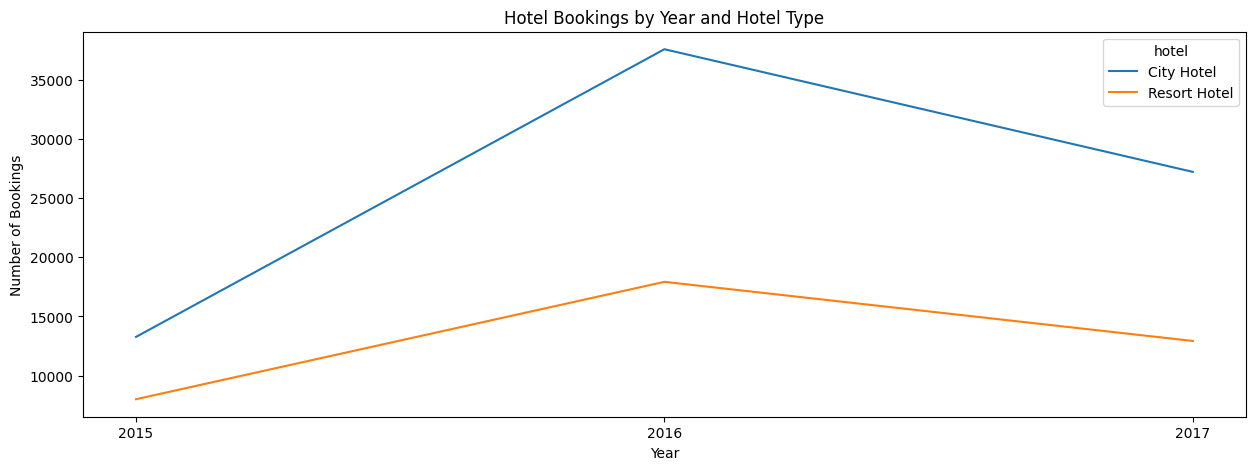

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


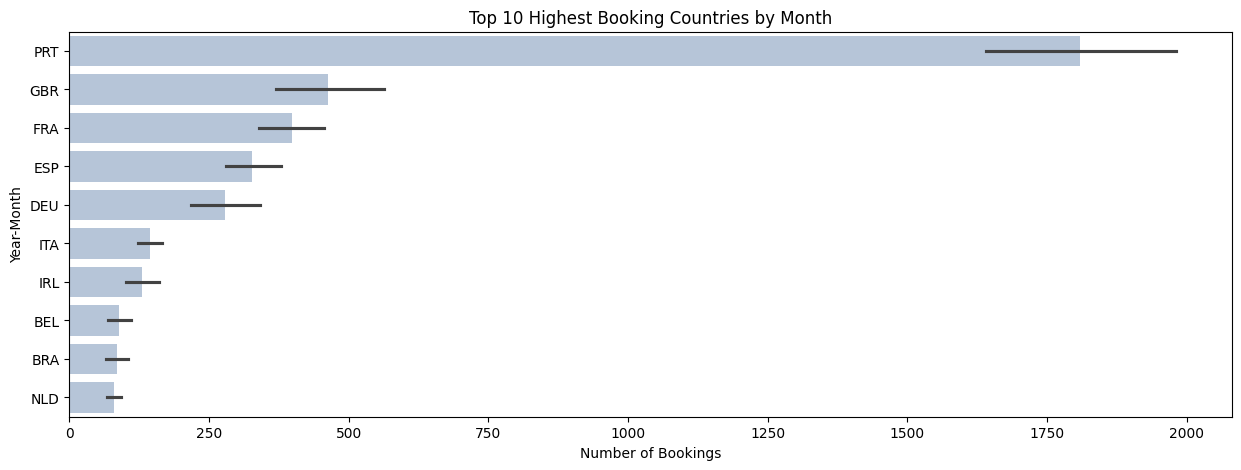

In [30]:
#lineplot for cancellation rate of hotel upon months
plt.figure(figsize=(15, 5))
sns.lineplot(data=data, x='arrival_date_month', y='is_canceled', hue='hotel')
plt.title('Cancellation Rate Trend by Hotel Type and Month')
plt.xlabel('Month')
plt.ylabel('Cancellation Rate')
plt.show()

print('-'*180)

# Grouping data and plotting
hotel_bookings_by_year = data.groupby('arrival_date_year')['hotel'].value_counts().unstack()
hotel_bookings_by_year.plot(kind='line', figsize=(15, 5))

# Setting the title and labels
plt.title('Hotel Bookings by Year and Hotel Type')
plt.xlabel('Year')
plt.ylabel('Number of Bookings')

# Setting x-ticks to be integers
plt.xticks(ticks=hotel_bookings_by_year.index)

# Display the plot
plt.show()

print('-'*180)

# Create a new column for year-month
data['year_month'] = pd.to_datetime(data['arrival_date_year'].astype(str) + '-' + data['arrival_date_month'].astype(str))

# Group data by year-month and country, and count the number of bookings
bookings_by_country = data.groupby(['year_month', 'country'])['hotel'].count().unstack().fillna(0)

# Get the top 10 countries with the highest number of bookings
top_10_countries = bookings_by_country.sum().nlargest(10).index

# Select data for the top 10 countries
top_10_data = bookings_by_country[top_10_countries]

# Plot the data as a horizontal bar chart with 'lightsteelblue' color
plt.figure(figsize=(15,5))
ax = sns.barplot(data=top_10_data, orient='h', color='lightsteelblue')
plt.title('Top 10 Highest Booking Countries by Month')
plt.xlabel('Number of Bookings')
plt.ylabel('Year-Month')
plt.show()


**Cancellation rate trend by rate trend and month**
* The cancellation rate, when analyzed by trend and month, reveals that March exhibits a lower cancellation rate, while April demonstrates a higher rate for City Hotels. Similarly, for Resort Hotels, from a high in June and August, the rate decreases to its lowest point in January and November. These insights highlight seasonal variations in cancellation behavior, which could be vital for hotel management and resource allocation at different times of the year.

**Hotel booking by year and hotel types**
* The data indicates that in 2016, both City and Resort hotels had the highest number of bookings. This insight implies a potential trend or peak period for hotel bookings during that particular year.

**Top 10 highest booking countries by month**

The top highest booking countries by month from higher to lower are:
1. Portugal (PRT)
2. United Kingdom (GBR)
3. France (FRA)
4. Spain (SPA)
5. Germany (DEU)
6. Italy (ITA)
7. Ireland (IRL)
8. Belgium (BEL)
9. Brazil (BRA)
10. Netherlands (NLD)

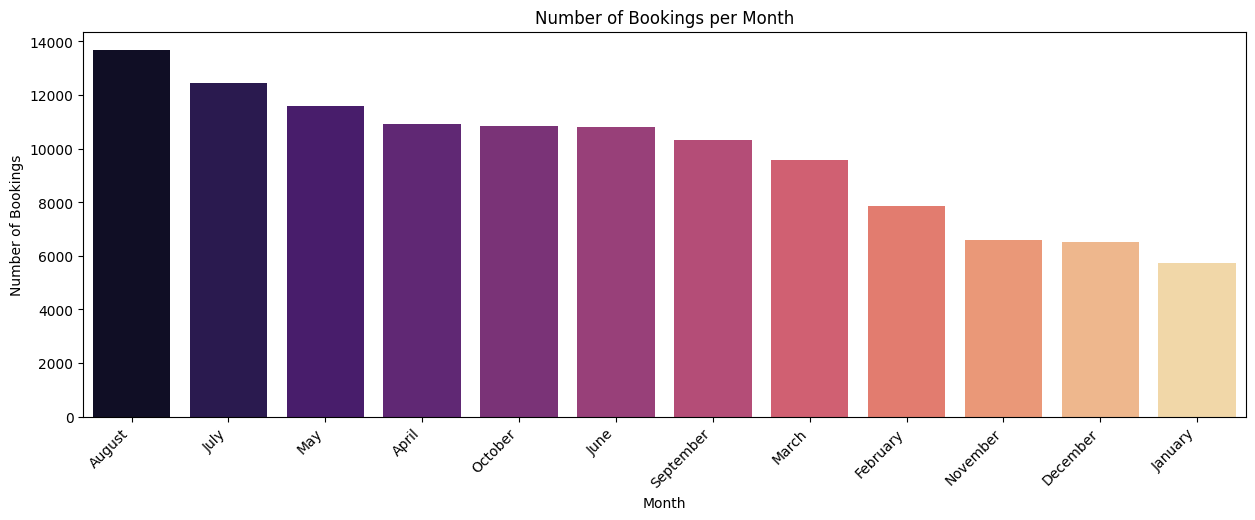

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


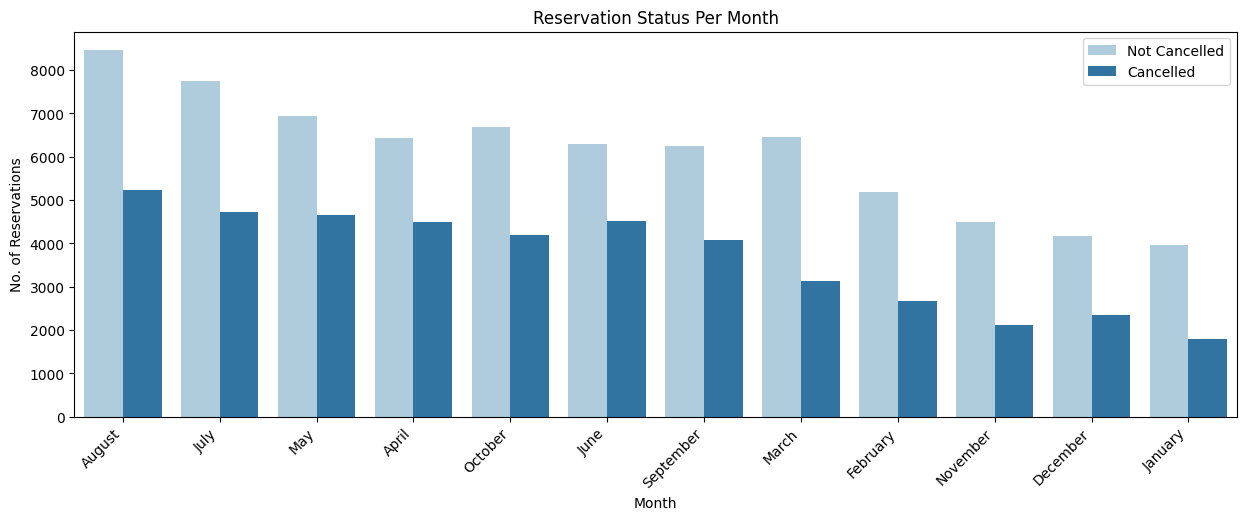

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


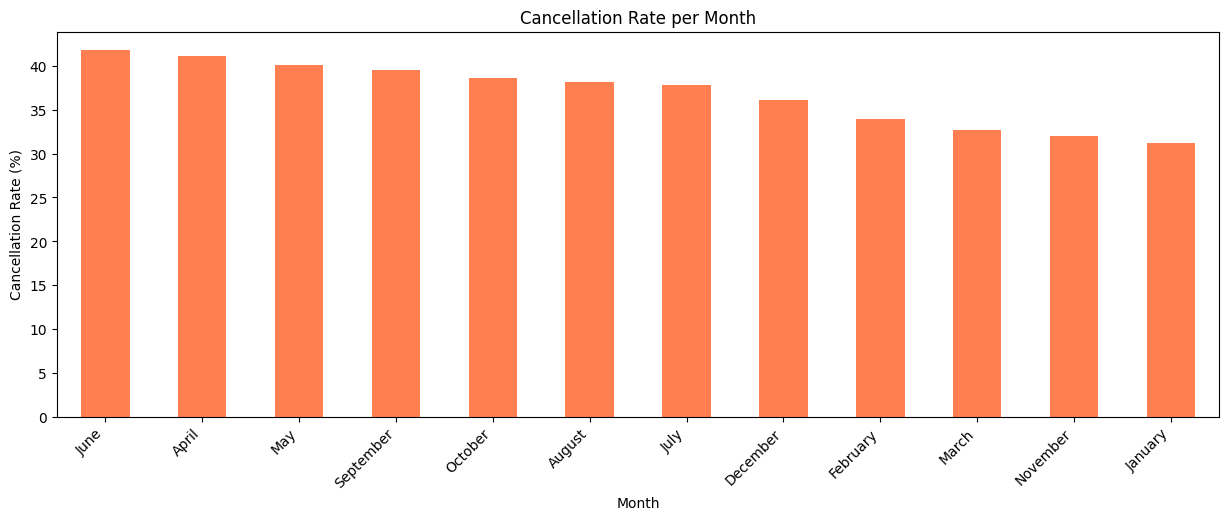

In [31]:
# Calculate the number of bookings per month and sort in descending order
bookings_per_month = data.groupby('arrival_date_month')['hotel'].count().sort_values(ascending=False)

# Create a bar chart to visualize the number of bookings per month
plt.figure(figsize=(15, 5))
ax = sns.barplot(x=bookings_per_month.index, y=bookings_per_month, palette='magma')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.title('Number of Bookings per Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.show()

print('-'*180)

# Create a countplot to visualize reservation status per month with a paired color palette
plt.figure(figsize=(15, 5))
ax = sns.countplot(x='arrival_date_month', hue='is_canceled', data=data, palette='Paired', order=data['arrival_date_month'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.title('Reservation Status Per Month')
plt.xlabel('Month')
plt.ylabel('No. of Reservations')
plt.legend(['Not Cancelled', 'Cancelled'])
plt.show()

print('-'*180)

# Calculate the cancellation rate per month
cancellation_rate_per_month = (data.groupby('arrival_date_month')['is_canceled'].mean() * 100).sort_values(ascending=False)

# Create a bar chart to visualize the cancellation rate per month
plt.figure(figsize=(15, 5))
ax = cancellation_rate_per_month.plot(kind='bar', color='coral')
plt.title('Cancellation Rate per Month')
plt.xlabel('Month')
plt.ylabel('Cancellation Rate (%)')

# Rotate x-axis labels for better readability
ax.set_xticklabels(cancellation_rate_per_month.index, rotation=45, ha='right')

plt.show()


**Number of booking per month**
* The number of bookings per month indicates that January experiences the lowest number of bookings, while the month of August sees a higher volume of bookings.

**Reservation status per month**
* The reservation status per month demonstrates that both cancelled and non-cancelled bookings are high in August and low in January.

**Cancellation rate per month**
* The cancellation rate per month indicates that it is high in June and low in January.


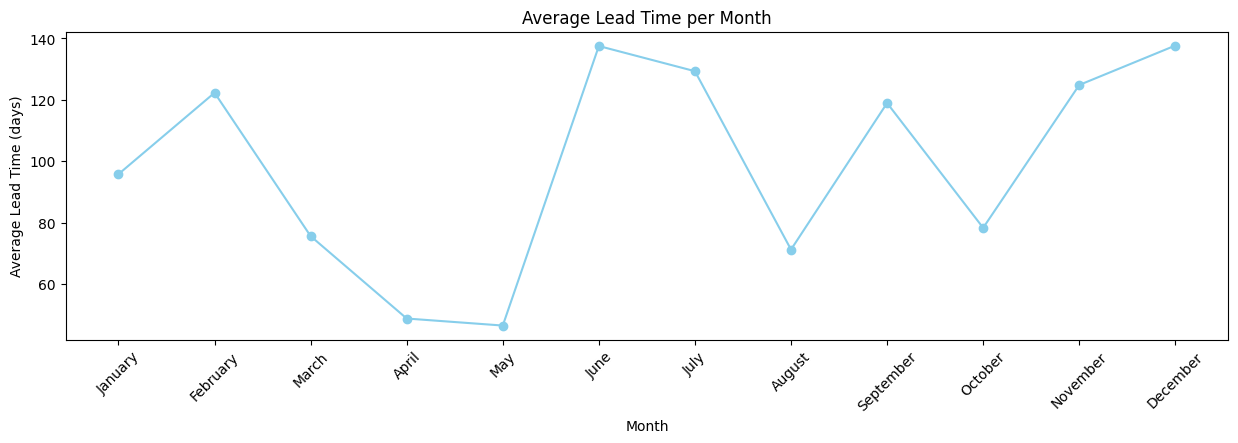

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


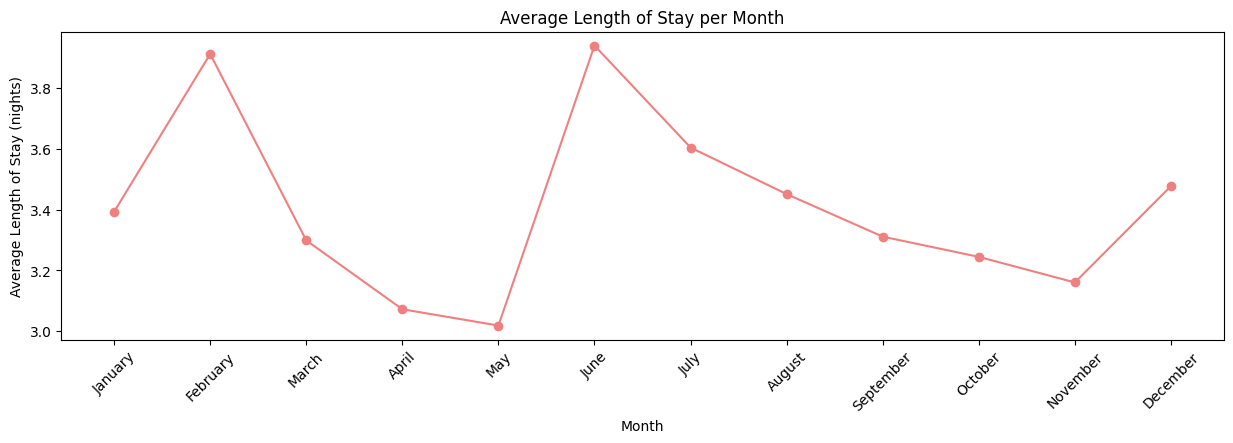

In [33]:
avg_lead_time_per_month = data.groupby('arrival_date_month')['lead_time'].mean()
avg_los_per_month = data.groupby('arrival_date_month')[['stays_in_week_nights', 'stays_in_weekend_nights']].mean().sum(axis=1)

# Plot average lead time per month
# Define the months in standard form
months = ['January', 'February', 'March', 'April', 'May', 'June',
          'July', 'August', 'September', 'October', 'November', 'December']

# Plotting the data
plt.figure(figsize=(15, 4))
avg_lead_time_per_month.plot(kind='line', marker='o', color='skyblue')

# Setting the title and labels
plt.title('Average Lead Time per Month')
plt.xlabel('Month')
plt.ylabel('Average Lead Time (days)')

# Setting x-ticks to show months in standard form
plt.xticks(ticks=range(len(months)), labels=months, rotation=45)

# Display the plot
plt.show()

print('-'*180)  # Display a separator

# Plot average length of stay per month
plt.figure(figsize=(15, 4))
avg_los_per_month.plot(kind='line', marker='o', color='lightcoral')
plt.title('Average Length of Stay per Month')
plt.xlabel('Month')
plt.ylabel('Average Length of Stay (nights)')
plt.xticks(ticks =range(len(months)),labels=months, rotation=45)  # Rotate x-axis labels for better readability
plt.show()

**Average lead time per month**
* The average lead time per month shows that it is high in June and December, while it is lowest in April and May.

**Average length of stay per month**
* The average length of stay per month is lowest in April and May and highest in February and June.


##**Area of improvement**##

**1. Price and Volume Dynamics**\
**Improvement:** Assess the profitability of the lower pricing strategy.\
**Action:** Conduct a detailed analysis of the impact on overall revenue and customer retention rates.\
**Goal:** Identify the optimal price point that maximizes both volume and profitability.

**2. Reservation Status**\
**Improvement:** Provide a detailed breakdown of cancellations and no-shows.\
**Action:** Analyze the reasons behind cancellations and no-shows, and identify patterns by season, booking channel, or customer demographics.\
**Goal:** Develop strategies to reduce cancellations and improve operational planning.

**3. Guest Demographics**\
**Improvement:** Explore potential growth in the family or child-centric market.\
**Action:** Investigate the preferences and needs of families to enhance offerings and services.\
**Goal:** Increase bookings and satisfaction among families traveling with children.


**4. Hotel Type Distribution**\
**Improvement:** Understand the factors behind the distribution of city versus resort hotels.\
**Action:** Analyze geographic locations, accessibility, amenities, and target customer profiles.\
**Goal:** Develop strategies to increase the market share of resort hotels.

**5. Market Segment Distribution**\
**Improvement:** Provide context on characteristics and preferences of each market segment.\
**Action:** Analyze the effectiveness of current marketing strategies targeting these segments.\
**Goal:** Optimize marketing efforts to better cater to each segment and increase market share.

**6. Cancellation Rate Disparity between Hotel Types**\
**Improvement:** Investigate reasons for higher cancellation rates in city hotels.\
**Action:** Examine cancellations by market segments, pricing, or booking channels.\
**Goal:** Develop targeted strategies to reduce cancellations in city hotels.

**7. Average Pricing Impact on Cancellation**\
**Improvement:** Understand the correlation between average pricing and cancellation rates.\
**Action:** Conduct a regression analysis or other statistical tests.\
**Goal:** Identify precise insights to optimize pricing strategies and reduce cancellations.

**8. Seasonal Variations in Cancellation Behavior**\
**Improvement:** Provide a more detailed analysis of seasonal peaks in cancellations.\
**Action:** Conduct a month-by-month or week-by-week analysis.\
**Goal:** Improve resource allocation and operational planning based on finer patterns.

**9. Booking Trends by Year and Country**\
**Improvement:** Understand the factors behind the peak bookings in 2016.\
**Action:** Analyze economic conditions, marketing campaigns, or external events.\
**Goal:** Identify key drivers and replicate successful strategies in future years.

**10. Seasonal Booking Patterns and Lead Time**\
- **Improvement:** Investigate reasons for high booking volumes in August and low volumes in January.\
- **Action:** Analyze factors such as holiday seasons, weather, or other influences.\
- **Goal:** Optimize promotional campaigns and inventory management based on seasonal trends.

**Additional Areas for Improvement**\

**Customer Feedback and Satisfaction**\
**Improvement:** Incorporate customer feedback and satisfaction data.\
**Action:** Analyze feedback to identify areas for improving the customer experience.\
**Goal:** Enhance customer retention and positive word-of-mouth.

**Competitive Analysis**\
**Improvement:** Benchmark against competitors.\
**Action:** Conduct competitive analysis to understand market positioning.\
**Goal:** Adjust strategies to better compete in the market.\

**Technological and Operational Efficiency**\
**Improvement:** Assess the impact of technology and operational efficiency.\
**Action:** Identify opportunities for automation and process improvements.\
**Goal:** Increase efficiency and improve booking patterns and guest satisfaction.

\
By addressing these areas, you can gain deeper insights and make more informed decisions to enhance your strategy in the hospitality industry.







##**Conclusion**##

1. **Booking Trends and Market Dynamics:**
   The data analysis highlights a trend of lower pricing across a high volume of instances, suggesting a strategic approach to attract a larger customer base.

2. **Reservation Patterns and Customer Behavior:**
   Check-out instances constitute a majority at 62.4%, resulting in a larger completed stay pattern. Cancellations represent 36%, while "no-show" instances are minimal at 1.0%. These observations provide insights for revenue management and operational planning.

3. **Guest Demographics and Hotel Type Distribution:**
   The data indicates that a majority of bookings—94.3%—accommodate adults, reflecting the prevalent customer demographic. Additionally, city hotels represent 66.7% of the pie chart distribution, while resort hotels account for 33.3%, offering crucial insights into the market share of each hotel type.

4. **Market Segment Distribution:**
   The donut chart data showcases varying proportions across different market segments, indicating the dominance of Online TA at 47.9%, followed by other segments.

5. **Cancellation Rate Disparity and Impact on Revenue:**
   The notable difference in cancellation rates between City Hotels at 42.20% and Resort Hotels at 28.29% provides insights into potential revenue impacts for each hotel type, guiding revenue management strategies.

6. **Seasonal Variations and Lead Time Impact:**
   The insights reveal seasonal variations in cancellation behavior, with peak periods in certain months. Additionally, the lead time peaks in June and December, while it is lowest in April and May.

7. **Yearly and Country-wise Booking Trends:**
   The analysis shows that in 2016, both City and Resort hotels experienced the highest number of bookings, pointing towards potential yearly booking trends. The top 10 highest booking countries by month offer insights into customer booking patterns.

In conclusion, the analysis provides valuable insights into revenue management, market segmentation, guest behavior, and seasonal demand fluctuations, offering a foundation for informed decision-making in the hospitality industry.

##**Github**##